In [1]:
import json

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models
from torchvision.transforms import v2

from torch.utils.tensorboard import SummaryWriter

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [2]:
import masks
from exp_base import get_accuracy, train, plot_probs, init_image

In [3]:
output = {
    "num_classes": [],
    "acc": [],
    "probs": [],
    "epochs": []
}

In [4]:
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

NUM_CLASSES = [62]
BATCH_SIZE = 64  
IMAGE_SIZE = 64
EPOCHS = 5000
MASK = masks.MaskLine
# CRITERION = FocalLoss(gamma=1) 
CRITERION = nn.CrossEntropyLoss()

# writer = SummaryWriter(f"runs/experiment 1", comment=f"{BATCH_SIZE=}\n{IMAGE_SIZE=}\n{EPOCHS=}\n{MASK.__name__=}\n{CRITERION.__class__.__name__=}")
print(f"Running experiment 1")

for num_classes in NUM_CLASSES:
    univ_image = init_image(IMAGE_SIZE)
    
    print(f"---------- num_classes={num_classes} ----------")
    
    univ_image, epochs = train(
        model=model,
        univ_image=univ_image,
        epochs=EPOCHS,
        batch_size=num_classes,
        num_classes=num_classes,
        criterion=CRITERION,
        mask=MASK,
        writer=None
    )
    
    acc, probs = get_accuracy(model, univ_image, num_classes, MASK)
    
    output["num_classes"].append(num_classes)
    output["acc"].append(acc /  num_classes)
    output["probs"].append(probs)
    output["epochs"].append(epochs)

with open("result.json", "w") as f:
    json.dump(output, f)

Running experiment 1
---------- num_classes=62 ----------
EPOCH = 0/5000 | loss = 12.748774528503418 | acc=0.0 | lr=0.1 | time=0:1
EPOCH = 500/5000 | loss = 2.4710614681243896 | acc=0.4838709677419355 | lr=0.1 | time=4:48
EPOCH = 1000/5000 | loss = 1.707015872001648 | acc=0.6451612903225806 | lr=0.1 | time=4:50
EPOCH = 1500/5000 | loss = 1.3807238340377808 | acc=0.7419354838709677 | lr=0.1 | time=4:54
EPOCH = 2000/5000 | loss = 1.0381828546524048 | acc=0.8225806451612904 | lr=0.1 | time=4:44
EPOCH = 2500/5000 | loss = 0.8148579001426697 | acc=0.8548387096774194 | lr=0.1 | time=4:48
EPOCH = 3000/5000 | loss = 0.8285595774650574 | acc=0.8870967741935484 | lr=0.1 | time=4:47
EPOCH = 3500/5000 | loss = 0.47179946303367615 | acc=0.9516129032258065 | lr=0.1 | time=4:37
EPOCH = 4000/5000 | loss = 0.35053712129592896 | acc=0.9838709677419355 | lr=0.1 | time=4:38
EPOCH = 4500/5000 | loss = 0.30356669425964355 | acc=0.9838709677419355 | lr=0.1 | time=4:38


TypeError: Object of type ndarray is not JSON serializable

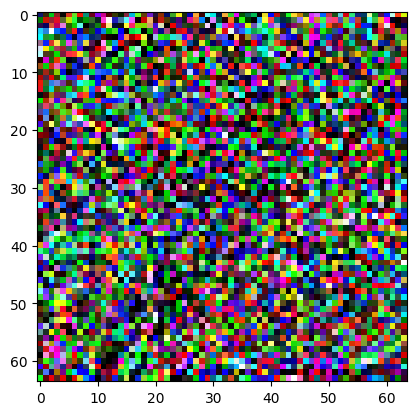

In [5]:
import matplotlib.pyplot as plt

plt.imshow((univ_image.permute(1, 2, 0).cpu().detach().numpy() * 255).astype(np.uint8))
plt.savefig("./image_mask_2.png")

In [6]:
model = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)

NUM_CLASSES = [62]
BATCH_SIZE = 64  
IMAGE_SIZE = 64
EPOCHS = 5000
MASK = masks.MaskImageAll
# CRITERION = FocalLoss(gamma=1) 
CRITERION = nn.CrossEntropyLoss()

# writer = SummaryWriter(f"runs/experiment 1", comment=f"{BATCH_SIZE=}\n{IMAGE_SIZE=}\n{EPOCHS=}\n{MASK.__name__=}\n{CRITERION.__class__.__name__=}")
print(f"Running experiment 1")

for num_classes in NUM_CLASSES:
    univ_image = init_image(IMAGE_SIZE)
    
    print(f"---------- num_classes={num_classes} ----------")
    
    univ_image, epochs = train(
        model=model,
        univ_image=univ_image,
        epochs=EPOCHS,
        batch_size=num_classes,
        num_classes=num_classes,
        criterion=CRITERION,
        mask=MASK,
        writer=None
    )
    
    acc, probs = get_accuracy(model, univ_image, num_classes, MASK)
    
    output["num_classes"].append(num_classes)
    output["acc"].append(acc /  num_classes)
    output["probs"].append(probs)
    output["epochs"].append(epochs)


Running experiment 1
---------- num_classes=62 ----------
EPOCH = 0/5000 | loss = 23.00395965576172 | acc=0.0 | lr=0.1 | time=0:0
EPOCH = 500/5000 | loss = 2.732283353805542 | acc=0.3870967741935484 | lr=0.1 | time=4:31
EPOCH = 1000/5000 | loss = 2.0278985500335693 | acc=0.5483870967741935 | lr=0.1 | time=4:25
EPOCH = 1500/5000 | loss = 1.728454351425171 | acc=0.6129032258064516 | lr=0.1 | time=4:24
EPOCH = 2000/5000 | loss = 1.3990705013275146 | acc=0.7258064516129032 | lr=0.1 | time=4:24
EPOCH = 2500/5000 | loss = 1.3110071420669556 | acc=0.7580645161290323 | lr=0.1 | time=4:26
EPOCH = 3000/5000 | loss = 1.1589752435684204 | acc=0.7741935483870968 | lr=0.1 | time=4:20
EPOCH = 3500/5000 | loss = 1.0578150749206543 | acc=0.7903225806451613 | lr=0.1 | time=4:21
EPOCH = 4000/5000 | loss = 0.9665800929069519 | acc=0.8225806451612904 | lr=0.1 | time=4:29
EPOCH = 4500/5000 | loss = 0.8714058995246887 | acc=0.8387096774193549 | lr=0.1 | time=4:32


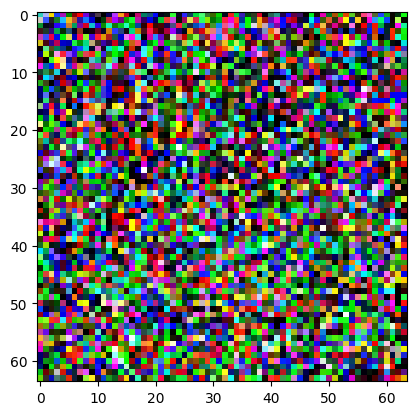

In [7]:
import matplotlib.pyplot as plt

plt.imshow((univ_image.permute(1, 2, 0).cpu().detach().numpy() * 255).astype(np.uint8))
plt.savefig("./image_mask_1.png")